# Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

Data:

Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

# THEORY
Absolutely, here's a breakdown of simple linear regression theory:

**Core Idea:**

* It's a statistical method to assess the relationship between two continuous variables.
* One variable, denoted by x, is the **predictor** (explanatory/independent) variable.
* The other variable, denoted by y, is the **response** (outcome/dependent) variable.

**Model and Line of Best Fit:**

* Simple linear regression assumes a **linear relationship** between x and y.
* This relationship is depicted by a **straight line**, also known as the **line of best fit**.
* The line minimizes the distance between the actual data points (y values) and the predicted y values from the equation of the line.

**Equation of the Line:**

The equation for the line of best fit is:

y = β₀ + β₁x

* β₀ (beta-nought) represents the **y-intercept**. This is the predicted value of y when x equals zero.
* β₁ (beta-one) represents the **slope**. It signifies the change in y for every one-unit change in x.
* There's also an inherent error term (ε) in the model, accounting for the unavoidable discrepancy between the actual data points and the fitted line.


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
advertising = pd.DataFrame(pd.read_csv("YOUR/FILE/PATH/Advertising.csv"))
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Inspection

In [3]:
advertising.shape


(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Data Cleaning

In [6]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

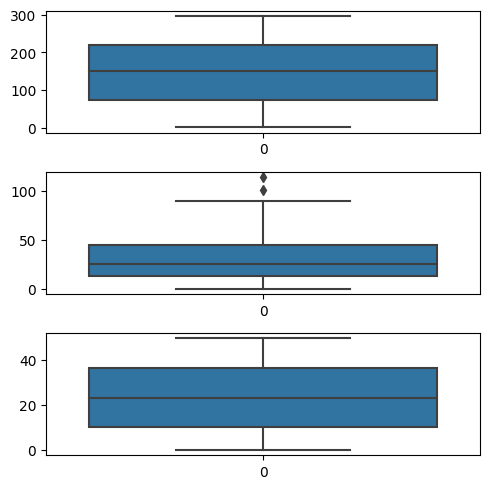

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['radio'], ax = axs[2])
plt.tight_layout()


In [8]:
# There are no considerable outliers present in the data.


# Exploratory Data Analysis

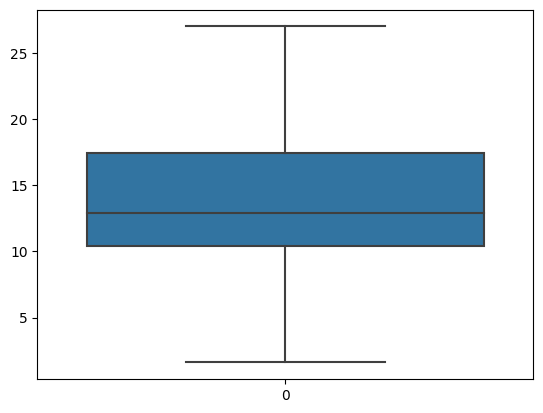

In [9]:
sns.boxplot(advertising['sales'])
plt.show()

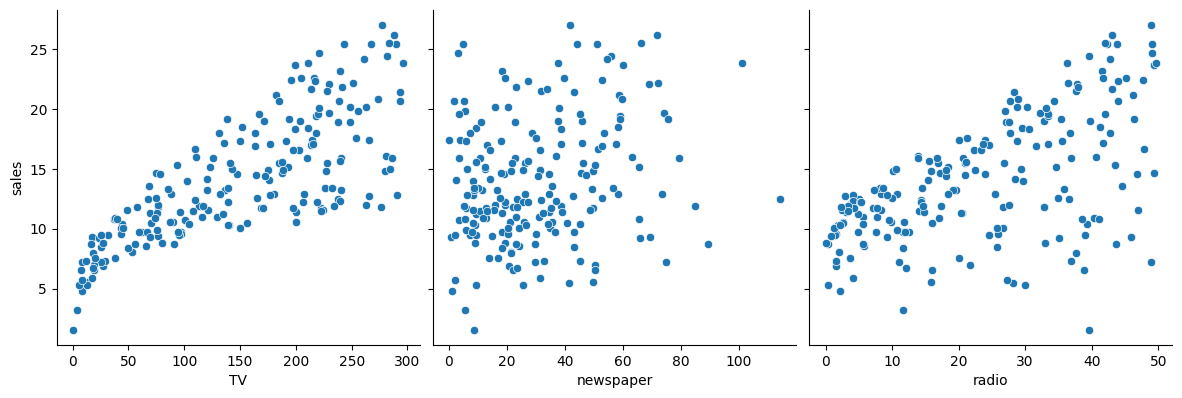

In [10]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()


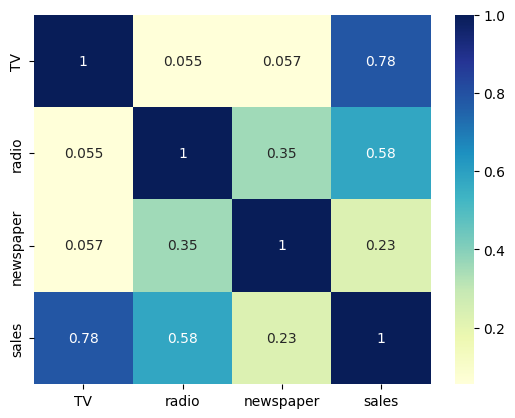

In [11]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Model Building


In [12]:

X = advertising['TV']
y = advertising['sales']

# Train-Test Split


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [15]:
y_train.head()


74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

# Building a Linear Model


In [16]:
import statsmodels.api as sm

In [17]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [18]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [19]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Thu, 02 May 2024   Prob (F-statistic):           2.84e-30
Time:                        20:21:24   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

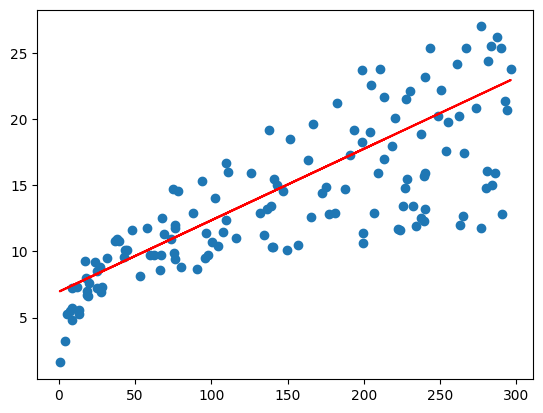

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [21]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)


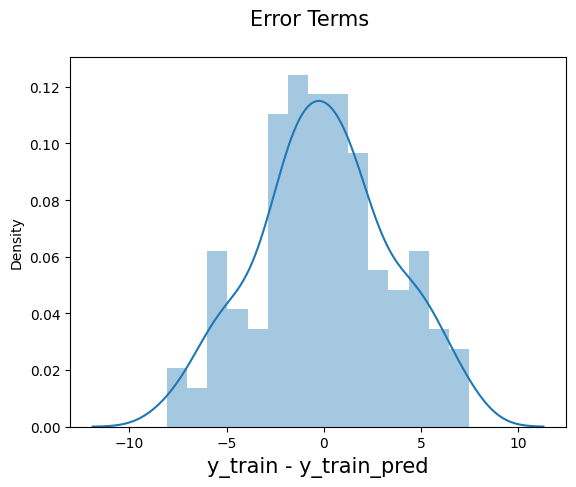

In [22]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()


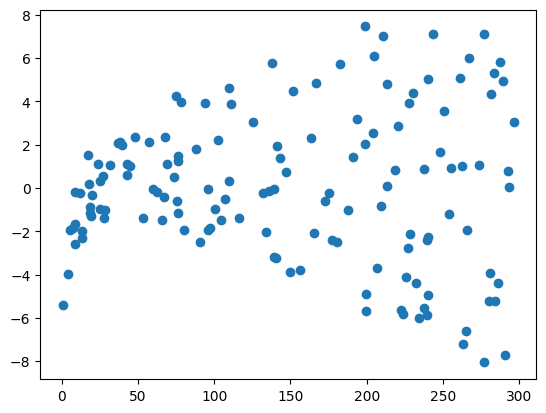

In [23]:
plt.scatter(X_train,res)
plt.show()


In [24]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)


In [25]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))


2.8241456288327003

In [28]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783303

Visualizing the fit on the test set

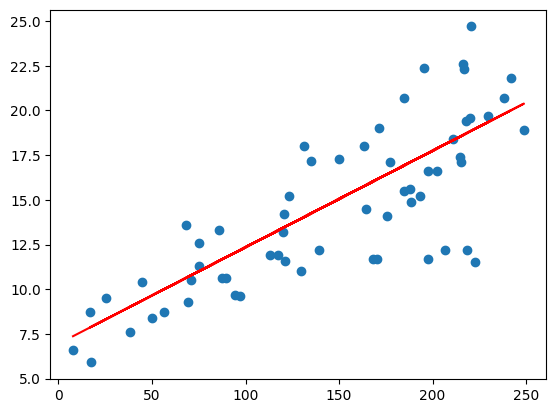

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()